In [1]:
import pandas as pd
from datetime import timedelta
#Data processing
from sklearn import preprocessing

In [2]:
df = pd.read_csv('../seatunnel_full.csv')

In [3]:
df

,url,begin_sha,end_sha,commits,additions,deletions,changed_files,begin_url,begin_time,begin_key,...,end_java:S5411,end_java:S5413,end_java:S5803,end_java:S5869,end_java:S5993,end_java:S6202,end_java:S6213,end_java:S6244,end_java:S6353,end_java:S6355
0,https://api.github.com/repos/apache/seatunnel/...,c203ef5f8d6ad8bfb7f284e32a9ce5f2bc1fe142,4d429cab55482986b4d8a24c699d315631c8242a,1,64,1,1,https://api.github.com/repos/apache/seatunnel/...,2023-06-06T08:28:39Z,seatunnel-c203ef5f8d6ad8bfb7f284e32a9ce5f2bc1f...,...,13,0,1,2,42,0,106,1,0,0
1,https://api.github.com/repos/apache/seatunnel/...,bde19b6377f7b2fb7a34b94bd06d6ce0cc44f348,c7745e63373c0fc92884982844bf55e22dd38af5,1,6,2,1,https://api.github.com/repos/apache/seatunnel/...,2023-06-05T08:59:42Z,seatunnel-bde19b6377f7b2fb7a34b94bd06d6ce0cc44...,...,13,0,1,2,42,0,106,1,0,0
2,https://api.github.com/repos/apache/seatunnel/...,e0d8519a9d7b6dfac29c1daf4199b6fe87781d0a,f4077cbbbbe5ea518073ee0035134ba0890e52b7,1,7,7,1,https://api.github.com/repos/apache/seatunnel/...,2023-06-02T15:08:41Z,seatunnel-e0d8519a9d7b6dfac29c1daf4199b6fe8778...,...,13,0,1,2,42,0,106,1,0,0
3,https://api.github.com/repos/apache/seatunnel/...,e0d8519a9d7b6dfac29c1daf4199b6fe87781d0a,0360e7e5185bd016458a20d3b597b4ccee83dfeb,1,3,2,1,https://api.github.com/repos/apache/seatunnel/...,2023-06-02T14:17:39Z,seatunnel-e0d8519a9d7b6dfac29c1daf4199b6fe8778...,...,13,0,1,2,42,0,106,1,0,0
4,https://api.github.com/repos/apache/seatunnel/...,e0d8519a9d7b6dfac29c1daf4199b6fe87781d0a,1b918160214a0b20ce1ae8f9e02f8e0dce243b53,1,1,0,1,https://api.github.com/repos/apache/seatunnel/...,2023-06-02T10:57:16Z,seatunnel-e0d8519a9d7b6dfac29c1daf4199b6fe8778...,...,13,0,1,2,42,0,106,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,https://api.github.com/repos/apache/seatunnel/...,04addef64bbd2567d47acbb7f434245fba7ac8a5,3b6a8b4058593b1ff11c44560ebcc56142cda830,1,11,1128,27,https://api.github.com/repos/apache/seatunnel/...,2019-08-13T15:14:02Z,seatunnel-04addef64bbd2567d47acbb7f434245fba7a...,...,0,0,0,0,0,0,0,0,0,0
2093,https://api.github.com/repos/apache/seatunnel/...,79339df3455c88ba606847d79b3b3a1682c97a67,04addef64bbd2567d47acbb7f434245fba7ac8a5,1,36,0,1,https://api.github.com/repos/apache/seatunnel/...,2019-08-13T02:16:57Z,seatunnel-79339df3455c88ba606847d79b3b3a1682c9...,...,0,0,0,0,0,0,0,0,0,0
2094,https://api.github.com/repos/apache/seatunnel/...,a475a8082b030af51a03e61457ed78b7cf17ab56,a26d21b7d28704facbfbbecfb501b958dd59d826,6,997,1045,81,https://api.github.com/repos/apache/seatunnel/...,2019-08-13T01:54:31Z,seatunnel-a475a8082b030af51a03e61457ed78b7cf17...,...,0,0,0,0,0,0,0,0,0,0
2095,https://api.github.com/repos/apache/seatunnel/...,96d0637c8471ec9370f15a522db0b23ff5dc7669,5fa746466941d871d4b1246b451f398416952541,14,964,122,64,https://api.github.com/repos/apache/seatunnel/...,2019-08-10T13:15:19Z,seatunnel-96d0637c8471ec9370f15a522db0b23ff5dc...,...,0,0,0,0,0,0,3,0,0,0


In [4]:
df['total_time'] = pd.to_datetime(df['end_time']) - pd.to_datetime(df['begin_time'])

In [5]:
df['median_time'] = df['total_time'][:178].median()

In [6]:
df['total_time'] < timedelta(minutes=2)

0       False
1       False
2       False
3       False
4       False
        ...  
2092    False
2093    False
2094    False
2095    False
2096    False
Name: total_time, Length: 2097, dtype: bool

In [7]:
df['time_binary'] = df['total_time'].apply(lambda x:  0 if x < timedelta (days = 3) else 1)

In [8]:
df.loc[:, ~df.columns.isin([
                                'url', 'begin_url', 'end_url',
                                # 'time_binary',
                                # 'total_time' ,
                                'begin_sha', 'end_sha', 'begin_time' , 'begin_key', 'begin_revision', 'end_time', 'end_key', 'end_revision'])]

,commits,additions,deletions,changed_files,begin_java:S100,begin_java:S101,begin_java:S106,begin_java:S1066,begin_java:S1068,begin_java:S107,...,end_java:S5869,end_java:S5993,end_java:S6202,end_java:S6213,end_java:S6244,end_java:S6353,end_java:S6355,total_time,median_time,time_binary
0,1,64,1,1,0,0,8,16,64,27,...,2,42,0,106,1,0,0,0 days 00:33:23,1 days 22:44:23.500000,0
1,1,6,2,1,0,0,8,16,64,27,...,2,42,0,106,1,0,0,0 days 17:17:51,1 days 22:44:23.500000,0
2,1,7,7,1,0,0,8,16,64,26,...,2,42,0,106,1,0,0,2 days 15:18:17,1 days 22:44:23.500000,0
3,1,3,2,1,0,0,8,16,64,26,...,2,42,0,106,1,0,0,2 days 00:57:53,1 days 22:44:23.500000,0
4,1,1,0,1,0,0,8,16,64,26,...,2,42,0,106,1,0,0,5 days 15:08:24,1 days 22:44:23.500000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,1,11,1128,27,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0 days 00:33:35,1 days 22:44:23.500000,0
2093,1,36,0,1,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0 days 00:09:14,1 days 22:44:23.500000,0
2094,6,997,1045,81,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0 days 23:14:31,1 days 22:44:23.500000,0
2095,14,964,122,64,0,0,1,0,0,0,...,0,0,0,3,0,0,0,31 days 01:05:35,1 days 22:44:23.500000,1


Visualize the Data

<Axes: xlabel='additions', ylabel='time_binary'>

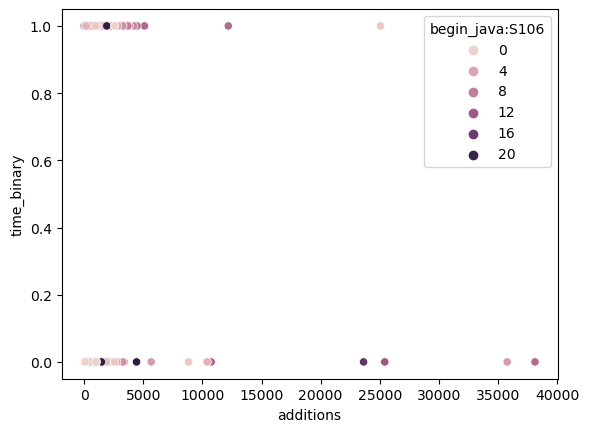

In [9]:
import seaborn as sns

sns.scatterplot(data = df, x = 'additions' ,y = 'time_binary' , hue = 'begin_java:S106')

Normalizing the Data

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['additions', 'time_binary']], df[['begin_java:S106']], test_size=0.33, random_state=0)

In [11]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

Fitting and Evaluating the Model

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, n_init='auto', random_state=0)

<Axes: xlabel='additions', ylabel='time_binary'>

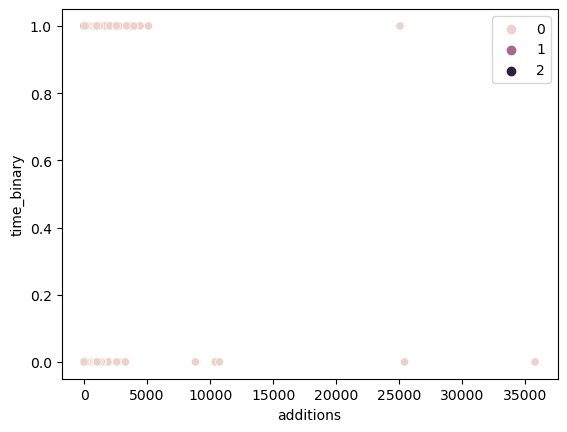

In [13]:
sns.scatterplot(data = X_train, x = 'additions', y = 'time_binary', hue = kmeans.labels_)

<Axes: ylabel='begin_java:S106'>

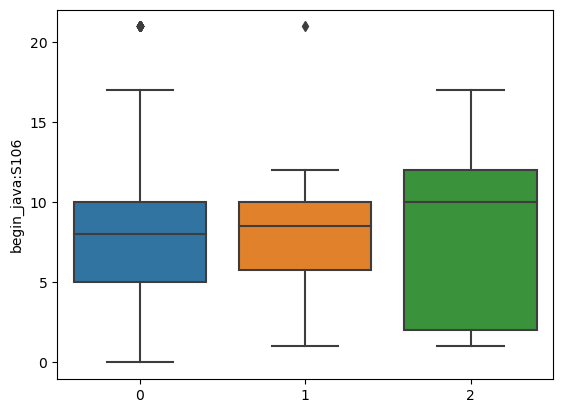

In [14]:
sns.boxplot(x = kmeans.labels_, y = y_train['begin_java:S106'])

In [15]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

0.9688973041024881

Choosing the best number of clusters

In [16]:
K = range(2, 8)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train_norm)

    # append the model to fits
    fits.append(model)

    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

<Axes: xlabel='additions', ylabel='time_binary'>

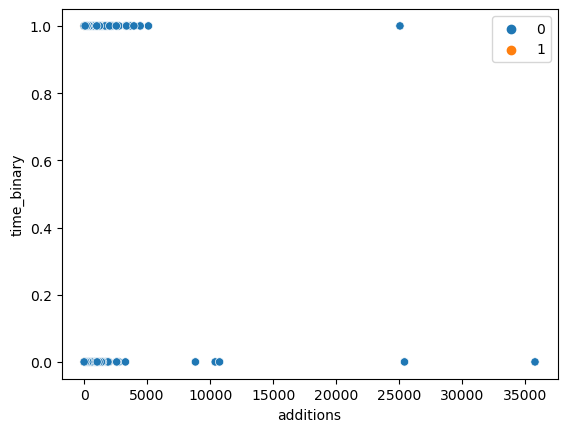

In [17]:
sns.scatterplot(data = X_train, x = 'additions', y = 'time_binary', hue = fits[0].labels_)

<Axes: xlabel='additions', ylabel='time_binary'>

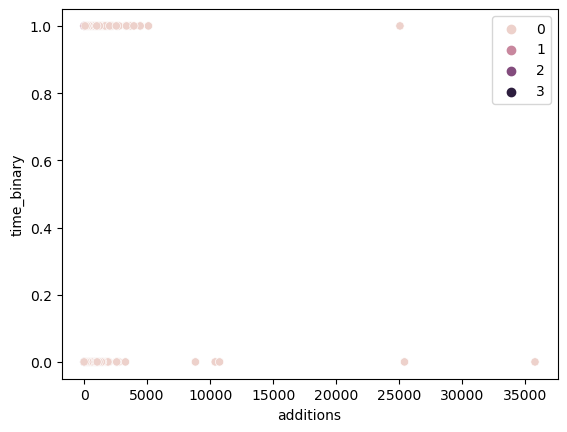

In [18]:
sns.scatterplot(data = X_train, x = 'additions', y = 'time_binary', hue = fits[2].labels_)

<Axes: >

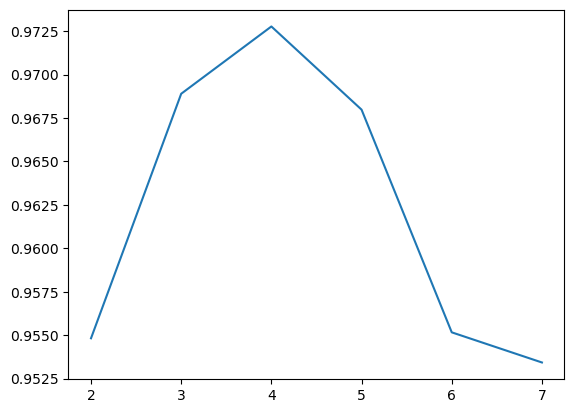

In [19]:
sns.lineplot(x = K, y = score)

<Axes: xlabel='additions', ylabel='time_binary'>

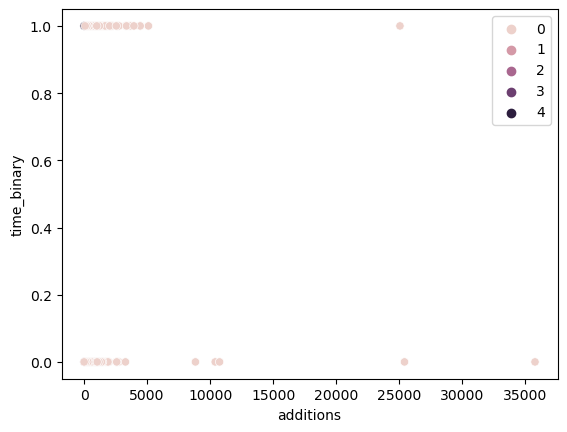

In [20]:
sns.scatterplot(data = X_train, x = 'additions', y = 'time_binary', hue = fits[3].labels_)

<Axes: ylabel='begin_java:S106'>

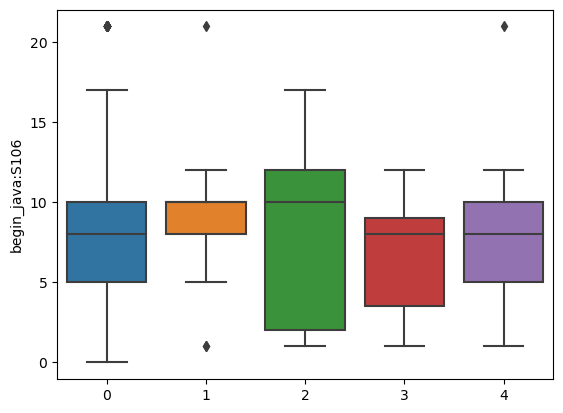

In [21]:
sns.boxplot(x = fits[3].labels_, y = y_train['begin_java:S106'])